In [1]:
import numpy as np
import pandas as pd
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import matplotlib
 
# DataSource
# https://www.kaggle.com/imdevskp/corona-virus-report/data#
    
file = 'covid_19_clean_complete.csv';

df1 = pd.read_csv(file,parse_dates=True);
%matplotlib inline


In [2]:
#1  First step is have a look at data set 
#1.1 what are all the columns available  
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [3]:
#1.2  Datatype for each column
df1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [4]:
#1.3 Data ranges . It doesnt makes sense for Lat ,Long , but for Confirmed , Deaths and Recovered it gives a sense 
df1.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,30740.000000,30740.000000,3.074000e+04,30740.000000,30740.000000
mean,21.181891,22.881195,4.464725e+03,297.383604,1311.136207
std,24.904277,70.245571,4.057051e+04,2811.876832,9658.594359
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,1.800000e+01,0.000000,1.000000
75%,41.153300,78.000000,3.930000e+02,5.000000,90.000000
max,71.706900,178.065000,1.467820e+06,88754.000000,268376.000000


In [5]:
#Lattitude and Longitude are not required for analysis. Let me remove them 
df1 = df1.drop(columns=['Lat'])
df1.describe()

,Long,Confirmed,Deaths,Recovered
count,30740.000000,3.074000e+04,30740.000000,30740.000000
mean,22.881195,4.464725e+03,297.383604,1311.136207
std,70.245571,4.057051e+04,2811.876832,9658.594359
min,-135.000000,0.000000e+00,0.000000,0.000000
25%,-15.310100,0.000000e+00,0.000000,0.000000
50%,21.005900,1.800000e+01,0.000000,1.000000
75%,78.000000,3.930000e+02,5.000000,90.000000
max,178.065000,1.467820e+06,88754.000000,268376.000000


In [6]:
#Another method of dropping columns
df1 = df1.drop(['Long'],axis=1)
#Look at the actual values . its similar to Cat file | head 
df1.head(5)

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,1/22/20,0,0,0
1,NaN,Albania,1/22/20,0,0,0
2,NaN,Algeria,1/22/20,0,0,0
3,NaN,Andorra,1/22/20,0,0,0
4,NaN,Angola,1/22/20,0,0,0


In [7]:
df1.tail(5)


,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
30735,NaN,Sao Tome and Principe,5/16/20,235,7,4
30736,NaN,Yemen,5/16/20,122,18,1
30737,NaN,Comoros,5/16/20,11,1,3
30738,NaN,Tajikistan,5/16/20,1322,36,0
30739,NaN,Lesotho,5/16/20,1,0,0


In [8]:
#How many rows 
df1.shape

(30740, 6)

In [9]:
df1.size

184440

In [10]:
#How manu unique countries/Region and Province/States are there
# 2 formats for refering to the column. How use the column name with special characters.
df1['Country/Region'].nunique()


188

In [11]:
#first row
df1.iloc[1]

Province/State        NaN
Country/Region    Albania
Date              1/22/20
Confirmed               0
Deaths                  0
Recovered               0
Name: 1, dtype: object

In [12]:
#Filter only India's data and list the recent 5 rows
df_india = df1[df1['Country/Region'] == 'India']
df_india.tail(5)

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
29546,NaN,India,5/12/20,74292,2415,24420
29811,NaN,India,5/13/20,78055,2551,26400
30076,NaN,India,5/14/20,81997,2649,27969
30341,NaN,India,5/15/20,85784,2753,30258
30606,NaN,India,5/16/20,90648,2871,34224


In [13]:
# Convert the Date into DateTime datastructure
# Make the new column as the index
df_india.loc[:,'Date']=pd.to_datetime(df_india['Date']);
df_india.dtypes
#Note the change in Date from earlier describe

/Users/premkumarsj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Province/State            object
Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [14]:
df_india = df_india.set_index('Date')
df_india.tail(5)

,Province/State,Country/Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-05-12,NaN,India,74292,2415,24420
2020-05-13,NaN,India,78055,2551,26400
2020-05-14,NaN,India,81997,2649,27969
2020-05-15,NaN,India,85784,2753,30258
2020-05-16,NaN,India,90648,2871,34224


Text(0, 0.5, 'No of confirmed Cases')

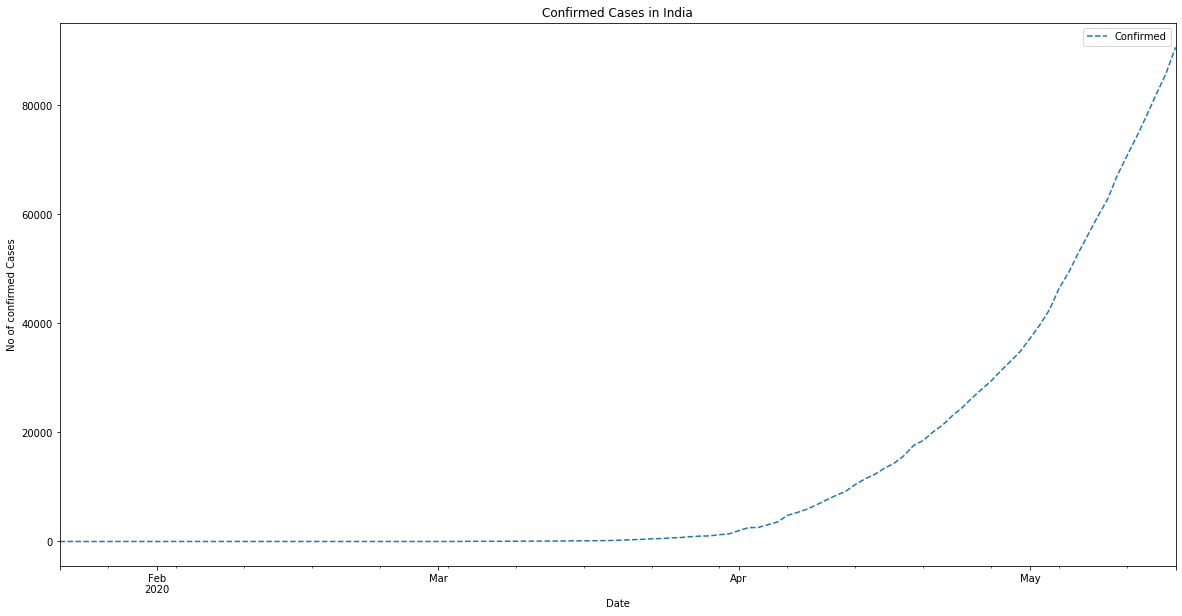

In [15]:
#Plot a line chart of confirmed cases in India 
ax = df_india['Confirmed'].plot(figsize=(20,10),title="Confirmed Cases in India",legend=True,linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('No of confirmed Cases')

Text(0, 0.5, 'No of Deaths')

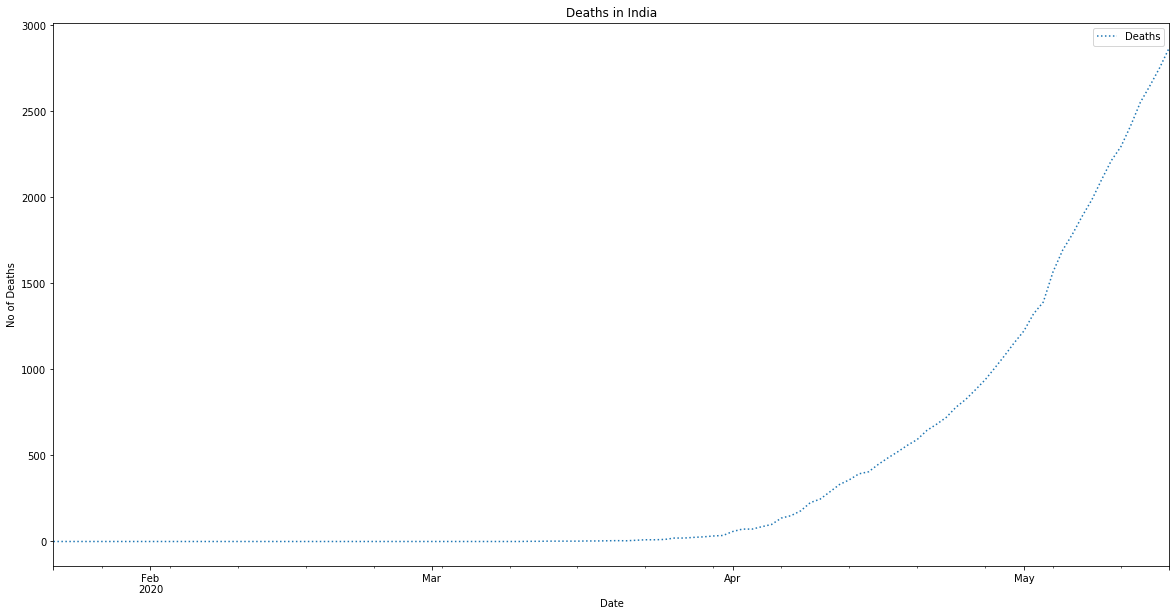

In [16]:
#Plot a line chart of confirmed cases in India 
ax = df_india['Deaths'].plot(figsize=(20,10),title="Deaths in India",legend=True,linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('No of Deaths')

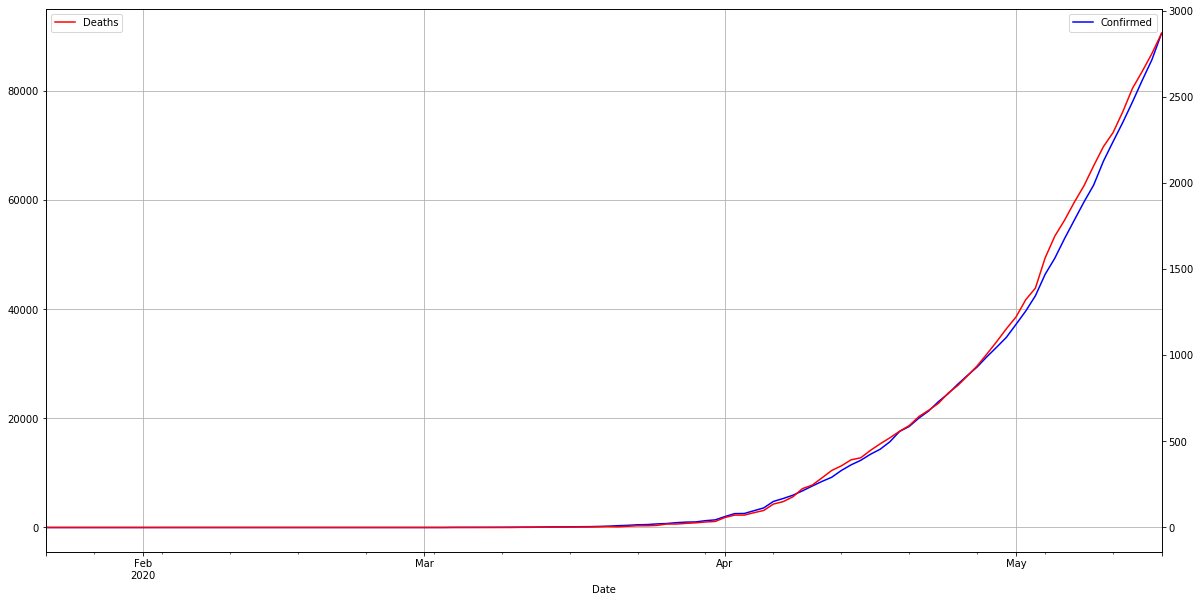

In [17]:
#Confirmed cases and deaths have different Scale 
#Plotting them . Can we plot them together to 2 Y-axis scales.

plt.figure(figsize=(20,10))
plt.xlabel('Number of requests every 10 minutes')

ax1 = df_india.Confirmed.plot(color='blue', grid=True, label='Confirmed')
ax2 = df_india.Deaths.plot(color='red', grid=True, secondary_y=True, label='Deaths')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()


In [18]:
#Converting Date as datetime. Note the change in datatype
df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [19]:
#Fine the latest date in the dataset
max_date = df1['Date'].max()
max_date

Timestamp('2020-05-16 00:00:00')

In [20]:
#Create a new dataframe with only values on the last date.
df_lastday = df1[df1['Date']==max_date]
df_lastday.shape

(265, 6)

In [21]:
# Need to identify the countries which have most infections 
# Reshape the dataframe to the format ( Country Vs Confirmed cases ; as on last day)
# Top 20 countries are the one which we are interested in 
top_countries_df = pd.pivot_table(df_lastday,index='Country/Region', values='Confirmed',aggfunc=np.sum)\
.sort_values(by='Confirmed',ascending=False).head(20)
top_countries_df

,Confirmed
Country/Region,
US,1467820
Russia,272043
United Kingdom,241461
Brazil,233511
Spain,230698
Italy,224760
France,179630
Germany,175752
Turkey,148067


In [22]:
# Get the index of the new dataframe and convert it into a list 
top_countries_list = top_countries_df.index

In [23]:
#Group by Date and Country ; sum up all sub-area,county etc
df_grouped_date = df1.groupby(['Date','Country/Region']).Deaths.sum()
df_grouped_date.head(5)
#Note the structure of data below

Date        Country/Region
2020-01-22  Afghanistan       0
            Albania           0
            Algeria           0
            Andorra           0
            Angola            0
Name: Deaths, dtype: int64

In [24]:
#Group by Country and Date ; sum up all sub-area,county etc
df_grouped_confirmed = df1.groupby(['Country/Region','Date']).Confirmed.sum()
df_grouped_confirmed.tail(5)
#Note the structure of data below and compare it with earlier

Country/Region  Date      
Zimbabwe        2020-05-12    36
                2020-05-13    37
                2020-05-14    37
                2020-05-15    42
                2020-05-16    42
Name: Confirmed, dtype: int64

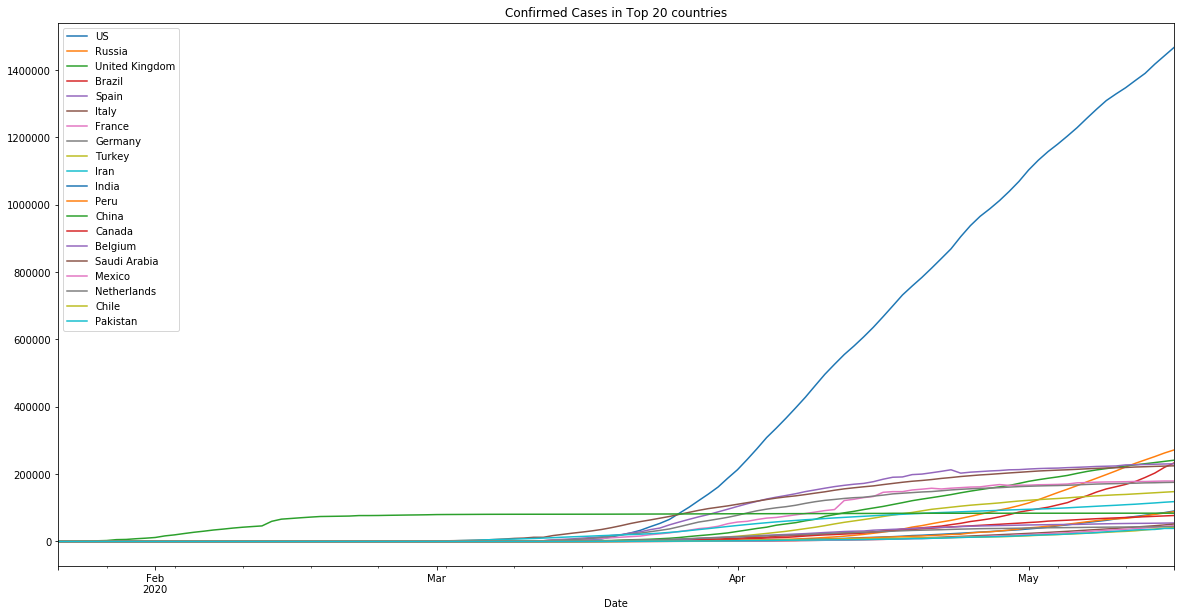

In [25]:
for country in top_countries_list:
    df_grouped_confirmed[country].plot.line(label= country,figsize=(20,10),\
                legend=True,title="Confirmed Cases in Top 20 countries" )

#Time series line plot of cumulative confirmed cases in top 20 countries    

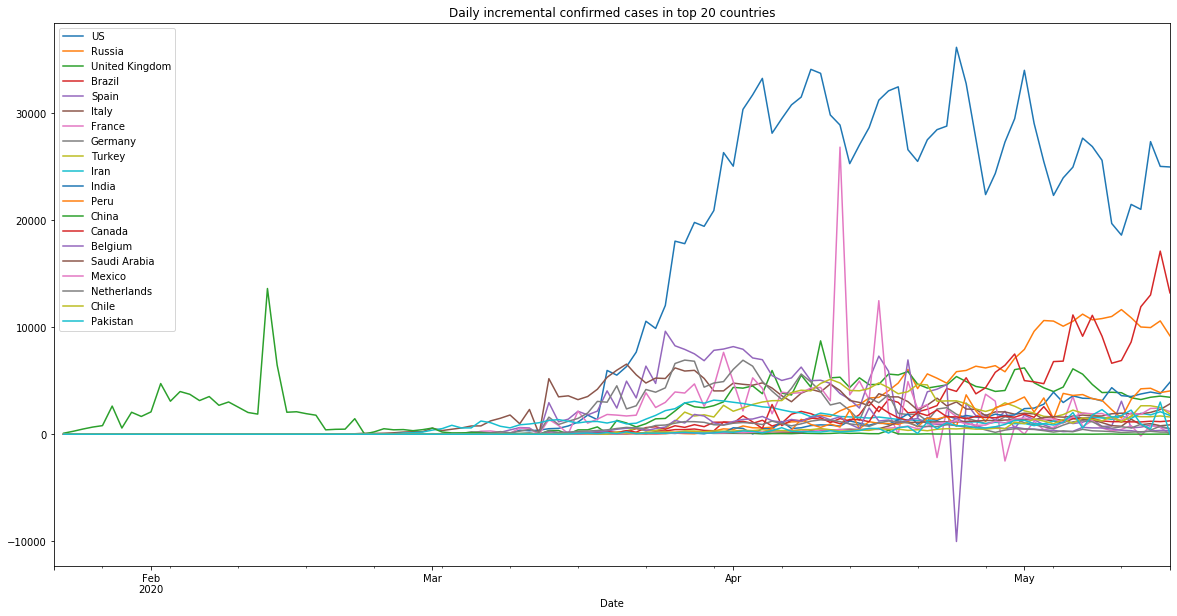

In [26]:
#In this usecase lot of importance is around the cases newly confirmed each day 
#.diff() calculates the difference of nth and n-1 th rows ie) newly added cases 
for country in top_countries_list:
    df_grouped_confirmed[country].diff().plot.line(label= country,figsize=(20,10),\
                legend=True,title="Daily incremental confirmed cases in top 20 countries" )
    
#Time series line plot of daily increases in confirmed cases in top 10 cases    

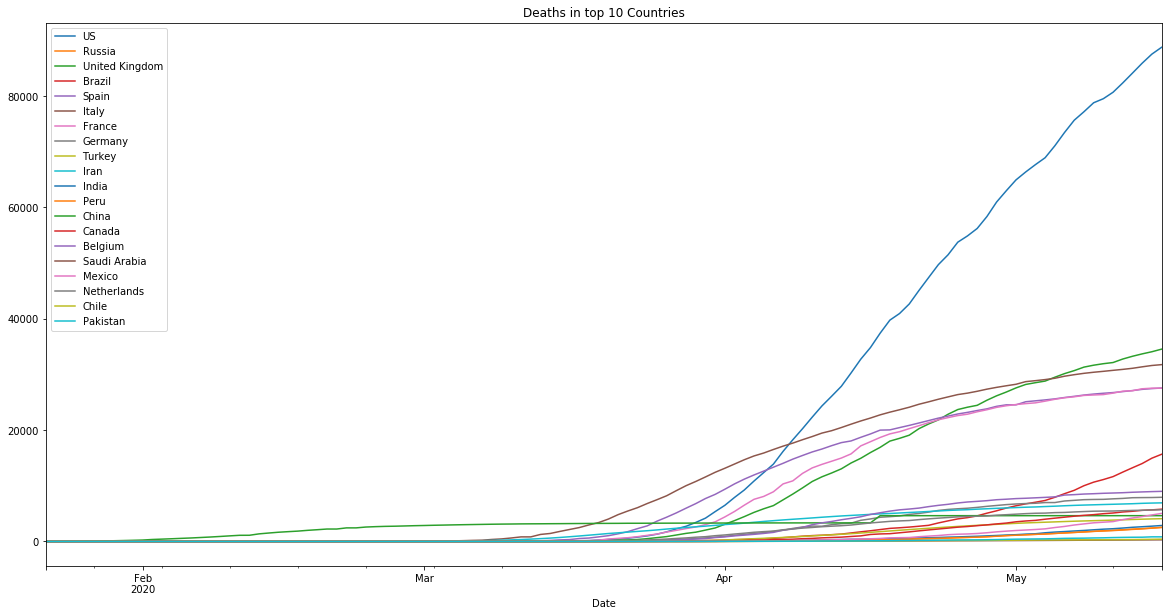

In [27]:
#Group by Country and then by Date on the Deaths
df_grouped_death = df1.groupby(['Country/Region','Date']).Deaths.sum()
for country in top_countries_list:
    df_grouped_death[country].plot.line(label= country,figsize=(20,10),legend=True,\
                title="Deaths in top 10 Countries")
#Time series line plot of cumulative deaths in each of top 10 countries    

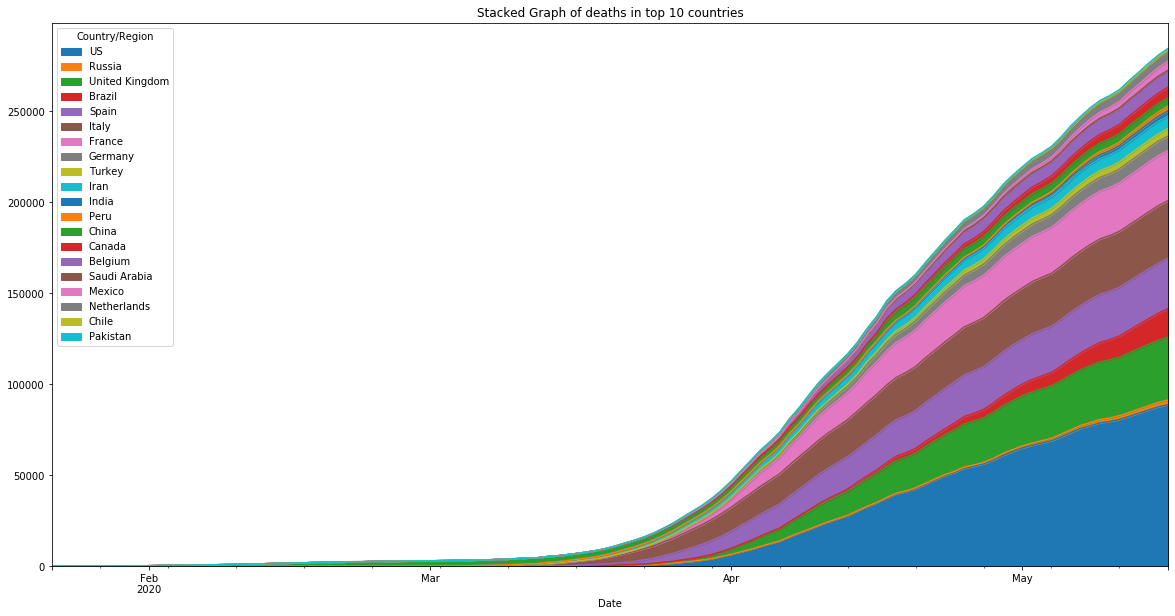

In [28]:
df2 = pd.pivot_table(df1,values='Deaths',index='Date',columns='Country/Region'\
                     ,aggfunc=np.sum);
#df2[top_countries_list].plot.area(figsize=(20,10),legend=True)
top = pd.Index.tolist(top_countries_list)
df2[top].plot.area(figsize=(20,10),title="Stacked Graph of deaths in top 10 countries")

#Charting total death as a stacked line chart in Top 10 countries

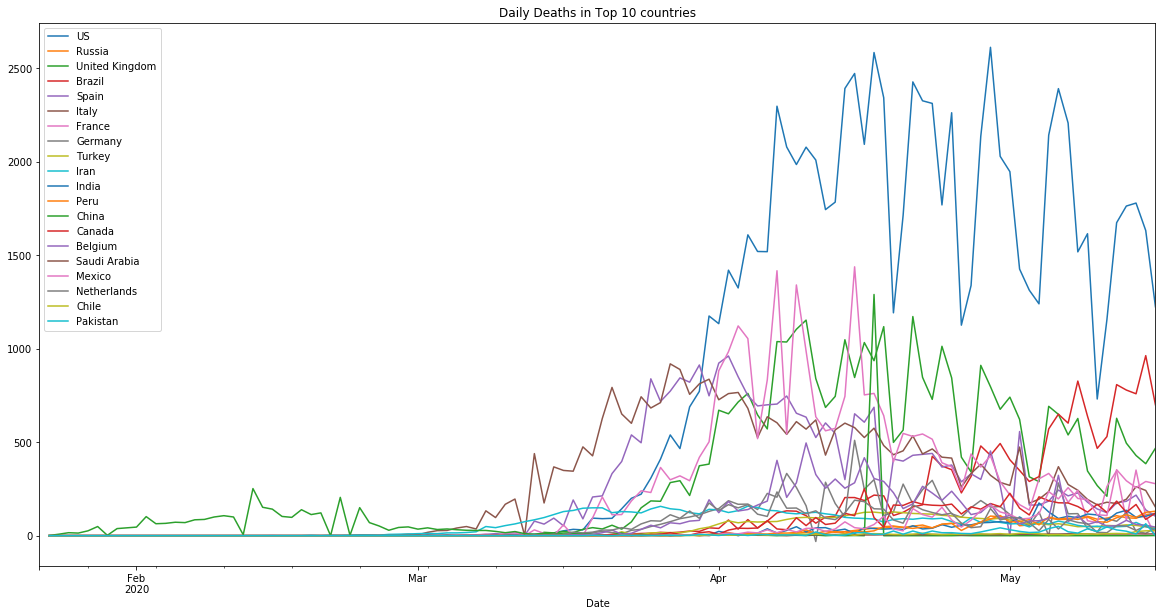

In [29]:

for country in top_countries_list:
    df_grouped_death[country].diff().plot.line(label= country,figsize=(20,10),legend=True,\
                    title="Daily Deaths in Top 10 countries")
#Time series line plot of daily increases in death in top 10 cases    

In [30]:
#Reshaping the data such that Date vs Country for Deaths 
df_pivot_countries_death = df1.pivot_table(values=['Deaths'],index=['Date'],columns='Country/Region',aggfunc=np.sum)
df_pivot_countries_death.tail(5)

Deaths                                                     \
Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
Date                                                                            
2020-05-12             127      31     515      48      2                   3   
2020-05-13             132      31     522      49      2                   3   
2020-05-14             136      31     529      49      2                   3   
2020-05-15             153      31     536      49      2                   3   
2020-05-16             168      31     542      51      2                   3   

                                                    ...                 \
Country/Region Argentina Armenia Australia Austria  ... United Kingdom   
Date                                                ...                  
2020-05-12           319      47        98     623  ...          32769   
2020-05-13           329      48        98     624  ...          33264   
2020-05-14           353      49        98     626  ...          33693   
2020-05-15           356      52        98     628  ...          34078   
2020-05-16           363      55        98     629  ...          34546   

                                                                        \
Country/Region Uruguay Uzbekistan Venezuela Vietnam West Bank and Gaza   
Date                                                                     
2020-05-12          19         10        10       0                  2   
2020-05-13          19         11        10       0                  2   
2020-05-14          19         11        10       0                  2   
2020-05-15          19         11        10       0                  2   
2020-05-16          19         11        10       0                  2   

                                                     
Country/Region Western Sahara Yemen Zambia Zimbabwe  
Date                                                 
2020-05-12                  0    10      7        4  
2020-05-13                  0    12      7        4  
2020-05-14                  0    12      7        4  
2020-05-15                  0    15      7        4  
2020-05-16                  0    18      7        4  

[5 rows x 188 columns]

In [31]:
#Remove the additional column 
df_pivot_countries_death.columns = df_pivot_countries_death.columns.droplevel(0)
df_pivot_countries_death.tail(5)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-12,127,31,515,48,2,3,319,47,98,623,...,32769,19,10,10,0,2,0,10,7,4
2020-05-13,132,31,522,49,2,3,329,48,98,624,...,33264,19,11,10,0,2,0,12,7,4
2020-05-14,136,31,529,49,2,3,353,49,98,626,...,33693,19,11,10,0,2,0,12,7,4
2020-05-15,153,31,536,49,2,3,356,52,98,628,...,34078,19,11,10,0,2,0,15,7,4
2020-05-16,168,31,542,51,2,3,363,55,98,629,...,34546,19,11,10,0,2,0,18,7,4


In [32]:
#df_pivot_countries_death.columns
#df_pivot_countries_death.index

In [33]:
#Get the daily increment in the same format
df_pivot_countries_death_diff = df_pivot_countries_death.diff()
df_pivot_countries_death_diff[top_countries_list.tolist()].tail(10)

Country/Region,US,Russia,United Kingdom,Brazil,Spain,Italy,France,Germany,Turkey,Iran,India,Peru,China,Canada,Belgium,Saudi Arabia,Mexico,Netherlands,Chile,Pakistan
Date,,,,,,,,,,,,,,,,,,,,
2020-05-07,2207.0,88.0,539.0,602.0,213.0,274.0,178.0,117.0,57.0,68.0,104.0,94.0,0.0,175.0,76.0,10.0,257.0,85.0,4.0,21.0
2020-05-08,1518.0,98.0,627.0,827.0,229.0,243.0,243.0,118.0,48.0,55.0,96.0,87.0,0.0,156.0,106.0,10.0,199.0,71.0,9.0,14.0
2020-05-09,1615.0,104.0,346.0,639.0,179.0,194.0,80.0,39.0,50.0,48.0,116.0,100.0,0.0,126.0,60.0,10.0,193.0,64.0,10.0,37.0
2020-05-10,731.0,88.0,268.0,467.0,143.0,165.0,70.0,20.0,47.0,51.0,111.0,75.0,0.0,168.0,75.0,7.0,112.0,18.0,8.0,23.0
2020-05-11,1156.0,94.0,211.0,530.0,123.0,179.0,263.0,92.0,55.0,45.0,82.0,72.0,0.0,124.0,51.0,9.0,108.0,16.0,11.0,47.0
2020-05-12,1674.0,107.0,628.0,808.0,176.0,172.0,348.0,77.0,53.0,48.0,121.0,96.0,0.0,185.0,54.0,9.0,353.0,54.0,12.0,31.0
2020-05-13,1763.0,96.0,495.0,779.0,184.0,195.0,83.0,123.0,58.0,50.0,136.0,112.0,0.0,125.0,82.0,9.0,294.0,52.0,11.0,24.0
2020-05-14,1779.0,93.0,429.0,759.0,217.0,262.0,351.0,23.0,55.0,71.0,98.0,98.0,0.0,167.0,60.0,10.0,257.0,28.0,22.0,9.0
2020-05-15,1632.0,113.0,385.0,963.0,138.0,242.0,104.0,13.0,48.0,48.0,104.0,125.0,0.0,87.0,56.0,9.0,290.0,53.0,26.0,64.0


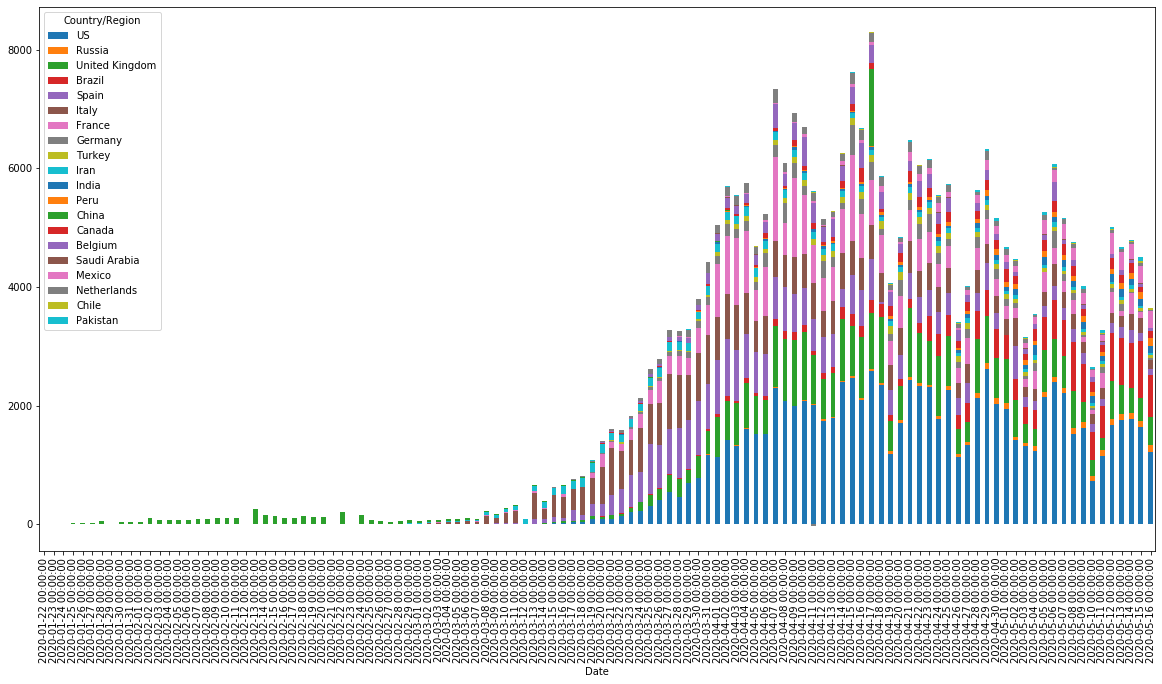

In [34]:
#Time series stacked bar plot of daily increases in death in top 10 countries
df_pivot_countries_death_diff[top_countries_list.tolist()].plot.bar(stacked=True,figsize=(20,10))

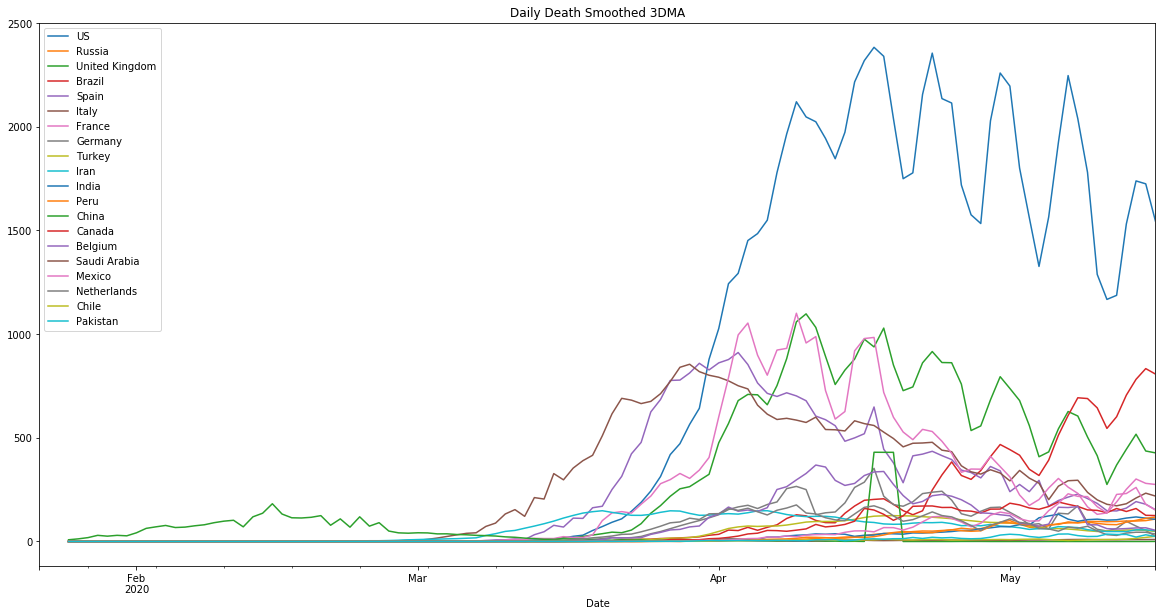

In [35]:
# Daily charts are very volatile . Curve can be smoothed by calculating moving averages.
#3 Day moving average of Death.
for country in top_countries_list:
    df_grouped_death[country].diff().rolling(3).mean().plot.line(label= country,\
                            figsize=(20,10),legend=True,title="Daily Death Smoothed 3DMA")
                                                            
#Time series line plot of daily increases in death in top 10 cases- smoothed - 3 Day Moving Average - 3DMA   

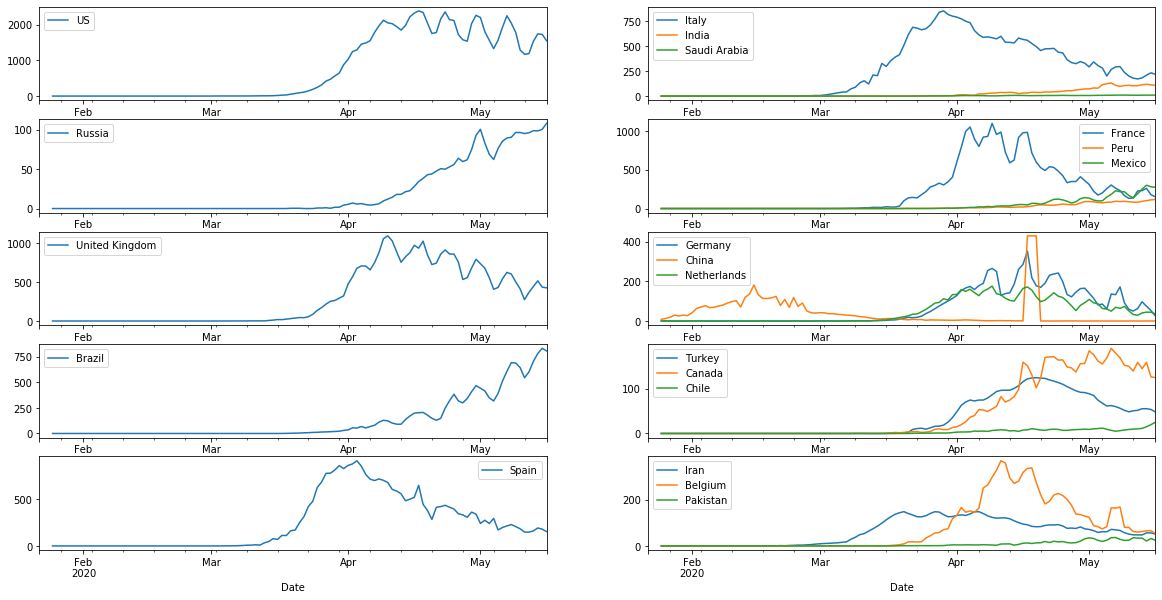

In [36]:
# 3 Day moving average of Death.
# Time series line plot of daily increases in death in top 10 cases- smoothed - 3 Day Moving Average - 3DMA    
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,10))
i=0;j=0;
for country in top_countries_list:
    if i==5 :
        i=0
        j=1
    df_grouped_death[country].diff().rolling(3).mean().plot.line(label= country ,ax=axes[i,j],legend=True)
    i=i+1;
plt.show()


In [37]:
#Observe the raw data and smoothed one .
df_grouped_death['US'].diff().rolling(3).mean().tail(5)

Date
2020-05-12    1187.000000
2020-05-13    1531.000000
2020-05-14    1738.666667
2020-05-15    1724.666667
2020-05-16    1545.000000
Name: Deaths, dtype: float64

In [38]:
df_grouped_death['US'].diff().tail(5)

Date
2020-05-12    1674.0
2020-05-13    1763.0
2020-05-14    1779.0
2020-05-15    1632.0
2020-05-16    1224.0
Name: Deaths, dtype: float64

/Users/premkumarsj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/premkumarsj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Actual Deaths vs Confirmed Case')

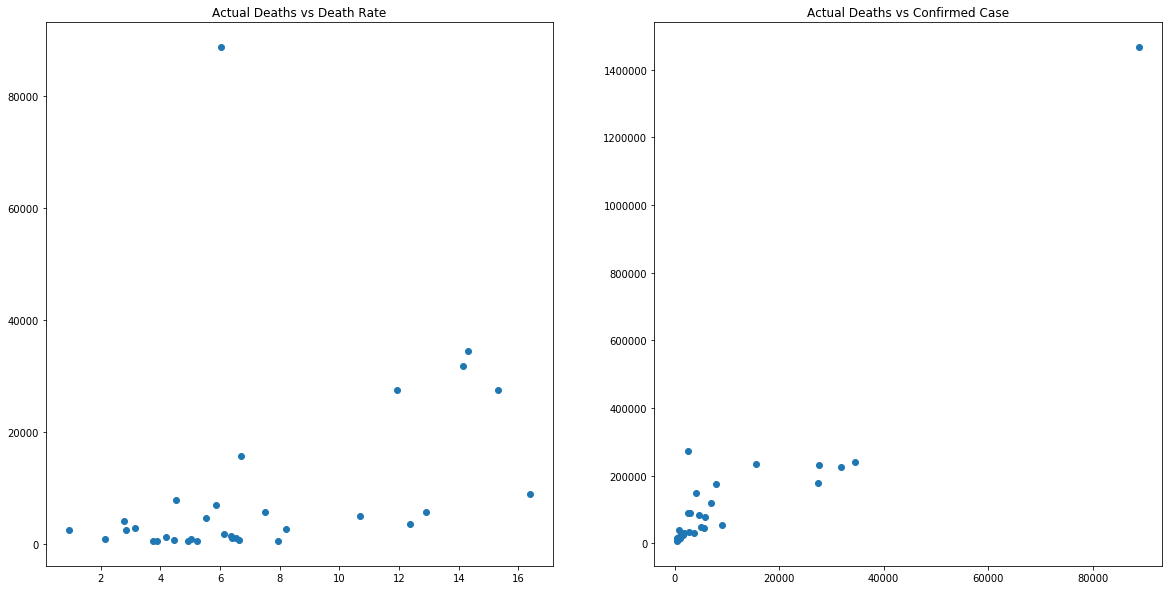

In [39]:
# On the latest date , calculate the death rate ie) Deaths vs confirmed 
# Scatter plot of confirmed Vs death 

df_lastday_details = pd.pivot_table(df_lastday,values=['Deaths','Confirmed'],index='Country/Region',aggfunc=np.sum)
df_lastday_details_gt_500 = df_lastday_details[df_lastday_details['Deaths'] > 500]
df_lastday_details_gt_500.loc[:,'DeathRate'] = (df_lastday_details_gt_500['Deaths']/df_lastday_details_gt_500['Confirmed'])*100;

#df_lastday_details_gt_500['DeathRate'] = (df_lastday_details_gt_500['Deaths']/df_lastday_details_gt_500['Confirmed'])*100;
#Above command throws settingwithcopywarning . Good article on how to deal with this warning 
#https://www.dataquest.io/blog/settingwithcopywarning/
    
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=False,figsize=(20,10))
ax1.scatter(df_lastday_details_gt_500['DeathRate'],df_lastday_details_gt_500['Deaths'])
ax1.set_title('Actual Deaths vs Death Rate')

ax2.scatter(df_lastday_details_gt_500['Deaths'],df_lastday_details_gt_500['Confirmed'])
ax2.set_title('Actual Deaths vs Confirmed Case')

#TODO how to put a legend for all the dots .